## Data Exploration

In [1]:
import pandas as pd
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


neutral


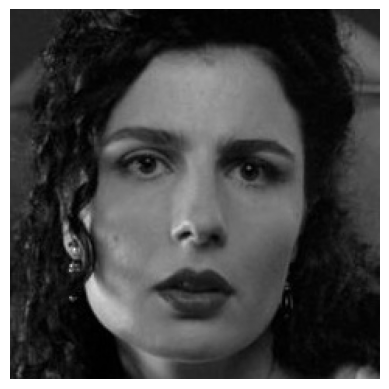

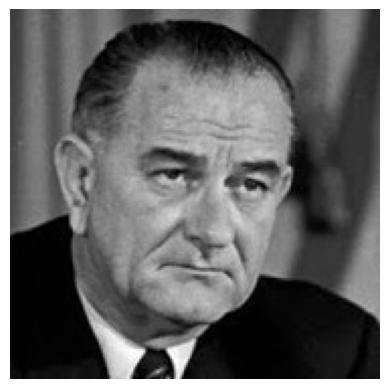

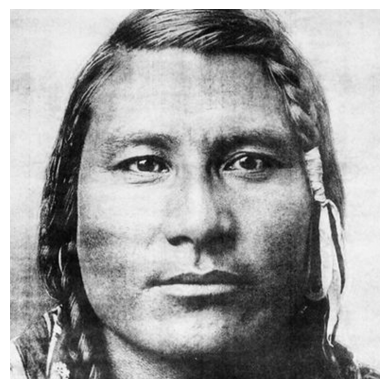

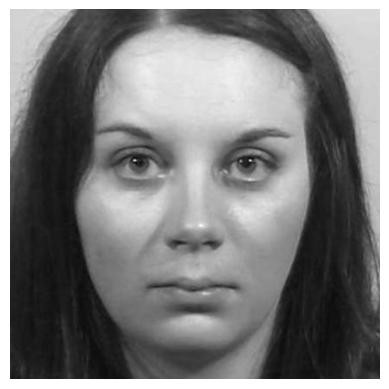

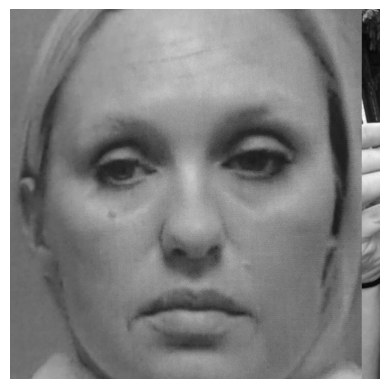

sad


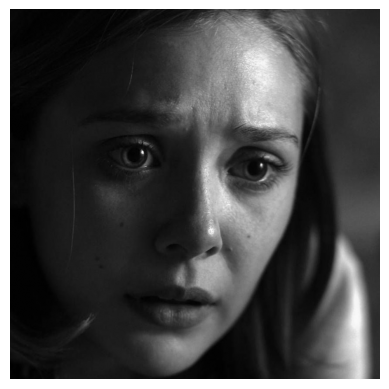

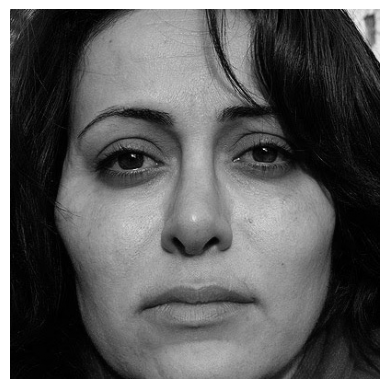

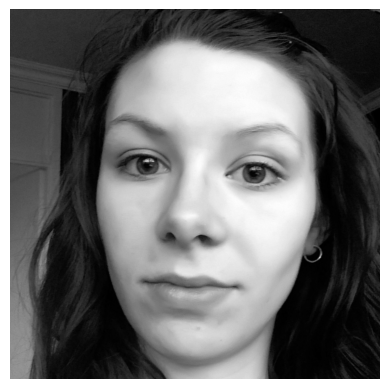

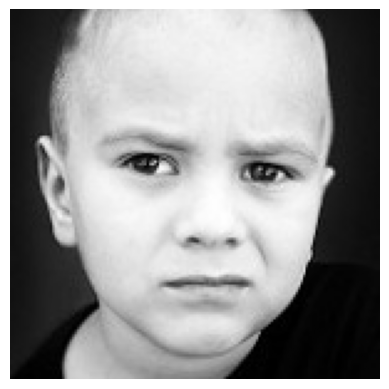

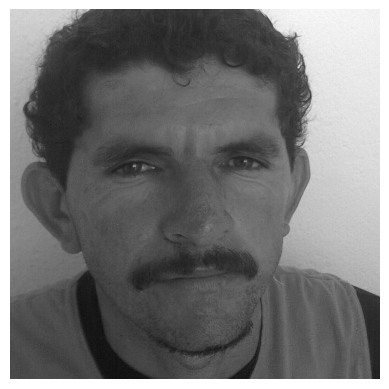

happy


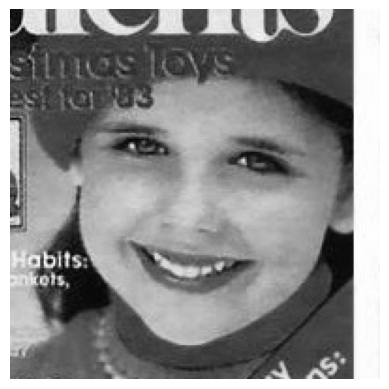

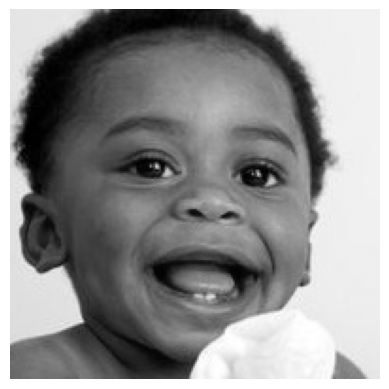

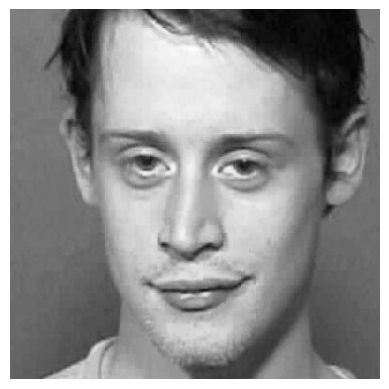

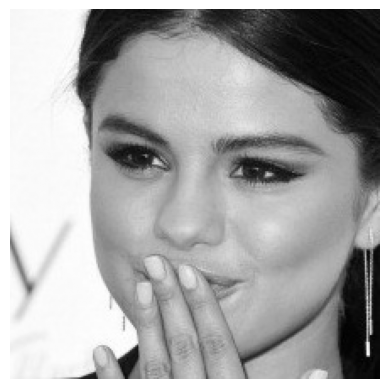

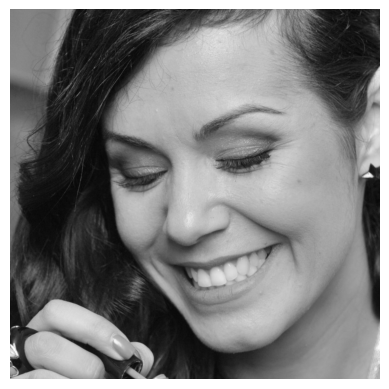

In [9]:
# Load the raw images and display the first 5 images for happy, sad and neutral classes

classes = ['neutral', 'sad', 'happy']

for c in classes:
    print(c)
    for i in range(5):
        img = cv2.imread(f"../data/raw/{c}/{os.listdir(f'../data/raw/{c}')[i]}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()


In [10]:
# Check size of the images in the raw folder - count the number of images in each size

sizes = {}

for c in classes:
    for filename in os.listdir(f"../data/raw/{c}"):
        img = cv2.imread(f"../data/raw/{c}/{filename}")
        size = img.shape[:2]
        if size in sizes:
            sizes[size] += 1
        else:
            sizes[size] = 1

In [11]:
print(sizes)

{(238, 238): 38, (183, 183): 37, (694, 694): 14, (425, 425): 9, (1077, 1077): 6, (327, 327): 31, (227, 227): 30, (2569, 2569): 1, (145, 145): 8, (1791, 1791): 1, (506, 506): 14, (265, 265): 31, (241, 241): 5, (852, 852): 3, (1122, 1122): 3, (261, 261): 24, (435, 435): 19, (203, 203): 33, (540, 540): 15, (455, 455): 15, (349, 349): 18, (963, 963): 8, (806, 806): 7, (271, 271): 24, (305, 305): 30, (285, 285): 6, (239, 239): 41, (366, 366): 14, (567, 567): 3, (527, 527): 5, (316, 316): 21, (1106, 1106): 2, (734, 734): 17, (468, 468): 13, (226, 226): 33, (210, 210): 29, (793, 793): 3, (809, 809): 2, (395, 395): 16, (1286, 1286): 1, (436, 436): 10, (1009, 1009): 3, (1872, 1872): 1, (417, 417): 21, (807, 807): 6, (856, 856): 1, (469, 469): 14, (244, 244): 39, (228, 228): 45, (234, 234): 43, (211, 211): 33, (282, 282): 27, (188, 188): 34, (465, 465): 3, (172, 172): 14, (555, 555): 8, (275, 275): 33, (576, 576): 12, (230, 230): 38, (896, 896): 3, (473, 473): 5, (2202, 2202): 1, (1977, 1977): 2

In [16]:
# Check whether the data is noisy, blurry, or contains artifacts (e.g. compression errors)

def calculate_noise_variance(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

# calculate the variance of Laplacian for 10 images from each class
for c in classes:
    print(f"Class: {c}")
    class_folder = f"../data/raw/{c}"
    images = os.listdir(class_folder)
    for i in range(min(10, len(images))):
        image_path = os.path.join(class_folder, images[i])
        try:
            variance = calculate_noise_variance(image_path)
            print(f"Image: {images[i]}, Noise variance: {variance}")
        except FileNotFoundError as e:
            print(e)

Class: neutral
Image: 000addf312c43df2195d4665da134a119860c413a57b5889c6a1d7aaf.jpg, Noise variance: 129.287991554743
Image: 000adf1bba31e39ce59b5222c82c89d61536a6c8bf1dd8ac50d99b3cf.jpg, Noise variance: 436.0892848475199
Image: 000bcd0fab9da27ee2ee16319c3ec6c703edf930d809bb1bbe039112f.jpg, Noise variance: 196.34377183809468
Image: 000c2b6983fc515f0597bf353edc0a4a2a7bd4c595f09238911c9e10f.jpg, Noise variance: 18.88014777735707
Image: 000cce21ce24a978a40753457795886de8ba6f56c2276ee6714d1a74f.jpg, Noise variance: 1268.0382572712801
Image: 000eb73e630f1e0bf788f4a00c8dc6c36208af14d39e00f78d06c1c5f.jpg, Noise variance: 420.6486002113738
Image: 000f61f64cd9bb364df45a47e896fe86a1267ecbc3d5c973d4f88cc6f.jpg, Noise variance: 541.5047364301254
Image: 000fb3643716cb52f5594d599507a762151ee7c4776271739439a1dbf.jpg, Noise variance: 157.12176410609024
Image: 001a52769b7f46995c69bc903ec737a17486c5c506b59801ba27a70ff.jpg, Noise variance: 595.5060993206379
Image: 00a1a2bd781f3a4e74c177c0bea2e25c8e15be72

In [17]:
# Calculate amount of images for each class

class_sizes = {c: len(os.listdir(f"../data/raw/{c}")) for c in classes}

print(class_sizes)

{'neutral': 10225, 'sad': 10011, 'happy': 12729}


<BarContainer object of 3 artists>

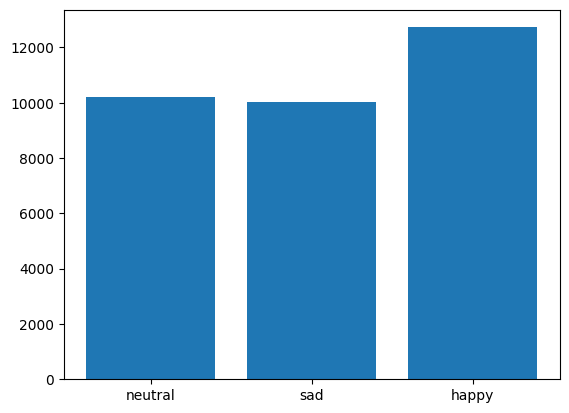

In [18]:
# Display the distribution of classes

plt.bar(class_sizes.keys(), class_sizes.values())

In [19]:
# Calculate amount of data for each class supposing that keep only with variance of Laplacian > 100

class_sizes_filtered = {}

for c in classes:
    class_folder = f"../data/raw/{c}"
    images = os.listdir(class_folder)
    filtered_images = [img for img in images if calculate_noise_variance(os.path.join(class_folder, img)) > 100]
    class_sizes_filtered[c] = len(filtered_images)



In [20]:
print(class_sizes_filtered)

{'neutral': 8943, 'sad': 8505, 'happy': 11791}
